In [ ]:
# Objectives: 
#        1) Use citipy to extract city names from lon and lat values
#        2) For each of the cities extract weather conditions using api
#        3) Plot scatter plots for lat values vs weather data
#        4) Perform regression analysis for lat values vs weather data      

In [ ]:
 #pip install citipy


In [1]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [23]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(f"Number of cities in the lists: {len(cities)}")
#print(cities)

Number of cities in the lists: 599


In [24]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list to fetch weather data
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
print("Done!")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Done!


In [25]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64


In [26]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,3.00,89,14,2.37,US,1698742752
1,necochea,-38.5473,-58.7368,6.44,74,90,1.34,AR,1698742753
2,port-aux-francais,-49.3500,70.2167,4.15,88,100,17.72,TF,1698742753
3,college,64.8569,-147.8028,-0.82,93,75,0.00,US,1698742528
4,tura,25.5198,90.2201,27.97,58,7,1.26,IN,1698742754


In [27]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [29]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,3.00,89,14,2.37,US,1698742752
1,necochea,-38.5473,-58.7368,6.44,74,90,1.34,AR,1698742753
2,port-aux-francais,-49.3500,70.2167,4.15,88,100,17.72,TF,1698742753
3,college,64.8569,-147.8028,-0.82,93,75,0.00,US,1698742528
4,tura,25.5198,90.2201,27.97,58,7,1.26,IN,1698742754


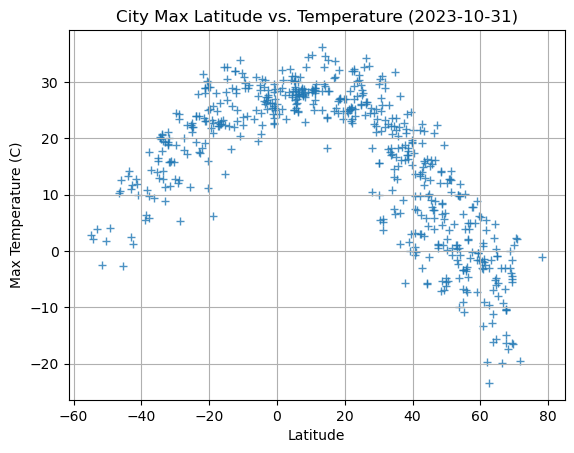

In [30]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    #edgecolor="black",
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

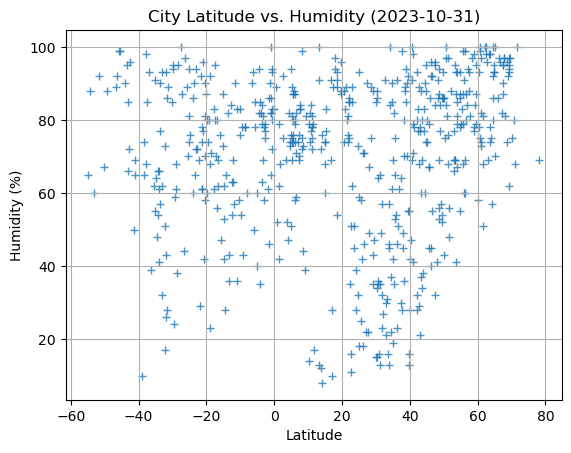

In [56]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    #edgecolor="black",
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

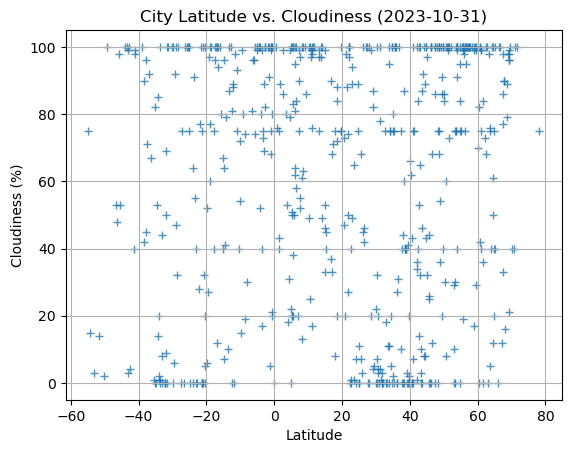

In [57]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    #edgecolor="black",
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

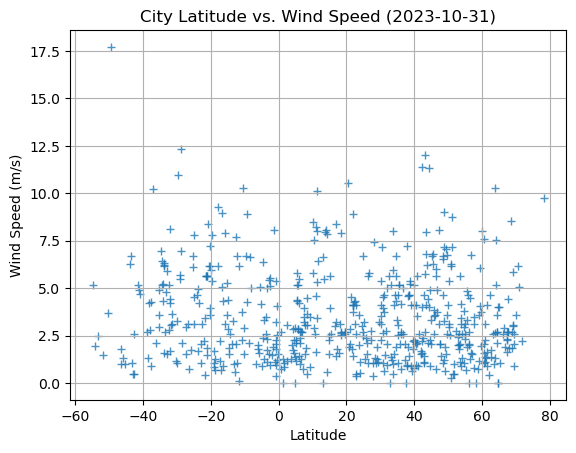

In [58]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    #edgecolor="black", 
    linewidths=1, 
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [125]:
# Regression analysis for each of the pairs above.

# Define a linear regression function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.marker="+",
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
   # print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [126]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,3.00,89,14,2.37,US,1698742752
3,college,64.8569,-147.8028,-0.82,93,75,0.00,US,1698742528
4,tura,25.5198,90.2201,27.97,58,7,1.26,IN,1698742754
7,tazovsky,67.4667,78.7000,-14.87,95,33,2.69,RU,1698742755
8,al jawf,29.5000,38.7500,23.50,47,5,3.21,SA,1698742755


In [127]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,necochea,-38.5473,-58.7368,6.44,74,90,1.34,AR,1698742753
2,port-aux-francais,-49.3500,70.2167,4.15,88,100,17.72,TF,1698742753
5,saint-pierre,-21.3393,55.4781,28.99,61,0,5.66,RE,1698742754
6,invercargill,-46.4000,168.3500,10.57,92,48,1.79,NZ,1698742754
9,posadas,-27.3671,-55.8961,19.99,100,0,1.54,AR,1698742755


The r value is: -0.8679707382244267


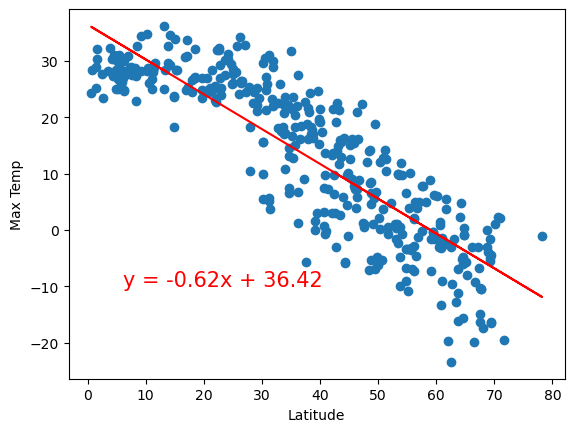

Regression line displays a negative relationship between temperature and latitude.
As you move away from equator the max temp decreases.


In [128]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))
print("Regression line displays a negative relationship between temperature and latitude.")
print("As you move away from equator the max temp decreases.")

The r value is: 0.7878785340542807


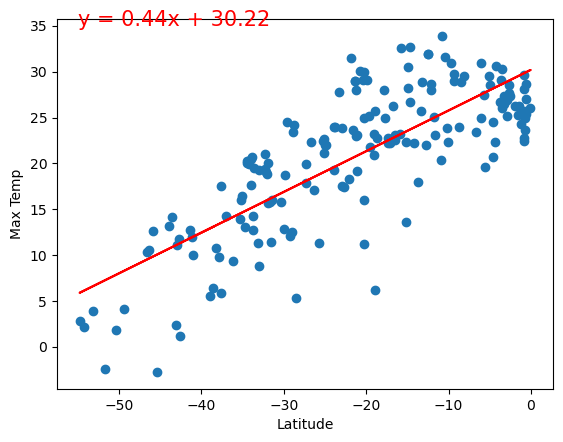

The regression line displays positive relationship between temperature and latitude.
As you move closer equator the max temp increases.


In [119]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))
print("The regression line displays positive relationship between temperature and latitude.")
print("As you move closer equator the max temp increases.")

The r value is: 0.2397820137359343


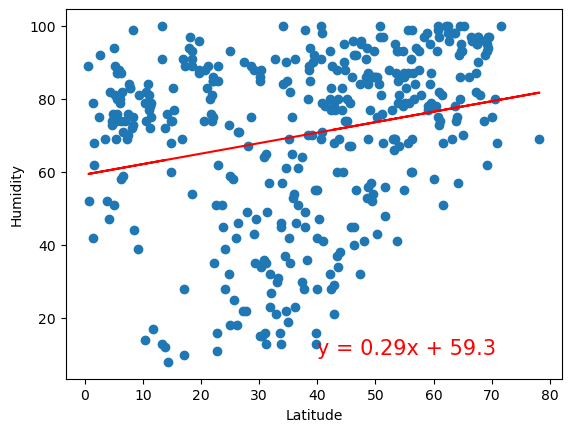

The regression is slightly positive with small correlation between humidty and latitude.
The humidity inceases as cities get closer to equator


In [104]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))
print("The regression is slightly positive with small correlation between humidty and latitude.")
print("The humidity inceases as cities get closer to equator")

The r value is: 0.012338794850669289


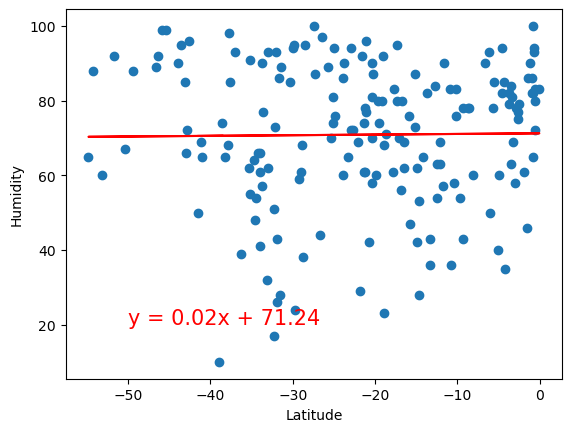

The regression is slightly positive with small correlation between humidty and latitude.
The humidity inceases as cities get closer to equator


In [102]:
# Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))
print("The regression is slightly positive with small correlation between humidty and latitude.")
print("The humidity inceases as cities get closer to equator")

The r value is: 0.060431213373732175


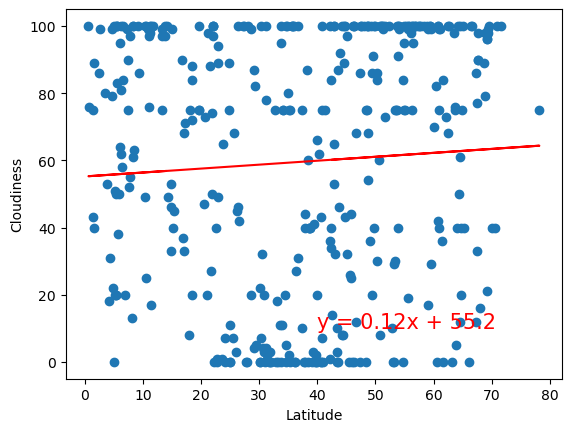

All data is spread out and no clear correlation between latitude and cloudiness can be made.


In [105]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))
print("All data is spread out and no clear correlation between latitude and cloudiness can be made.")

The r value is: 0.23151401784514145


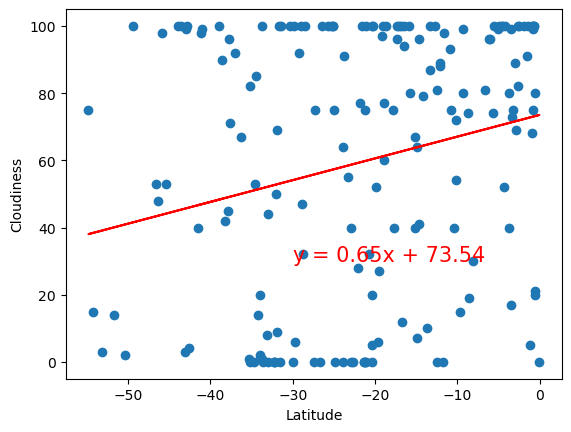

All data is spread out and no clear correlation between latitude and cloudiness can be made.


In [106]:
# Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))
print("All data is spread out and no clear correlation between latitude and cloudiness can be made.")

The r value is: 0.003411206029327414


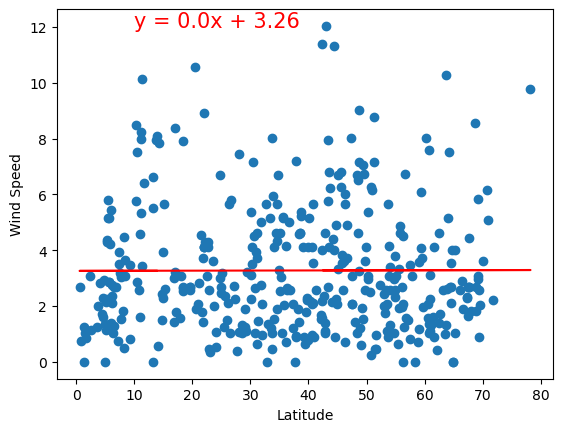

Regression line is flat showing no clear correlation between wind speed and latitude.


In [108]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))
print("Regression line is flat showing no clear correlation between wind speed and latitude.")

The r value is: -0.12777313175571495


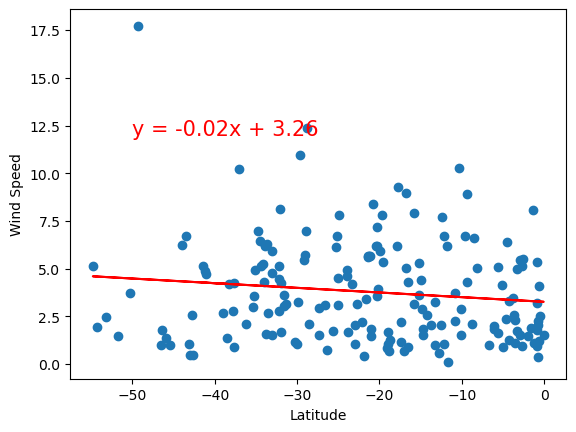

Regression line shows a slight negative correlation between wind speed and latitude.
Also there is one outlier it seems to be showing high wind speeds.


In [110]:
# Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))
print("Regression line shows a slight negative correlation between wind speed and latitude.")
print("Also there is one outlier it seems to be showing high wind speeds.")